In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [ ]:
n = 10
t_num = 50

In [ ]:
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n)])
y = np.array([df['value'].values[i+n] for i in range(len(df)-n)])

In [ ]:
len(X), len(y)

(25979, 25979)

In [ ]:
X.shape, y.shape

((25979, 10), (25979,))

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X_test, y_test = X[-t_num:], y[-t_num:]

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X[:-n]), np.array(y[:-n]), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20775, 10, 1), (5194, 10, 1), (20775,), (5194,))

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [ ]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(300, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 299, 64)           192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 149, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 64)           8256      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 74, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4736)              0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [ ]:
history1 = model1.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        verbose=1,
                        validation_data=(X_val, y_val))

Epoch 1/100


66/66 [==============================] - 1s 11ms/step - loss: 937.4398 - mae: 21.2056 - val_loss: 379.1033 - val_mae: 15.0648
Epoch 2/100
66/66 [==============================] - 1s 9ms/step - loss: 385.9183 - mae: 14.7135 - val_loss: 328.4289 - val_mae: 13.2429
Epoch 3/100
66/66 [==============================] - 1s 9ms/step - loss: 307.4853 - mae: 12.9094 - val_loss: 264.2886 - val_mae: 11.7122
Epoch 4/100
66/66 [==============================] - 1s 9ms/step - loss: 248.0350 - mae: 11.4170 - val_loss: 213.6873 - val_mae: 10.9733
Epoch 5/100
66/66 [==============================] - 1s 9ms/step - loss: 203.9003 - mae: 10.1576 - val_loss: 243.2088 - val_mae: 11.2706
Epoch 6/100
66/66 [==============================] - 1s 9ms/step - loss: 200.4914 - mae: 10.1771 - val_loss: 188.6595 - val_mae: 10.5778
Epoch 7/100
66/66 [==============================] - 1s 10ms/step - loss: 165.6961 - mae: 9.1719 - val_loss: 146.4143 - val_mae: 8.6569
Epoch 8/100
66/66 [==============================] - 

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

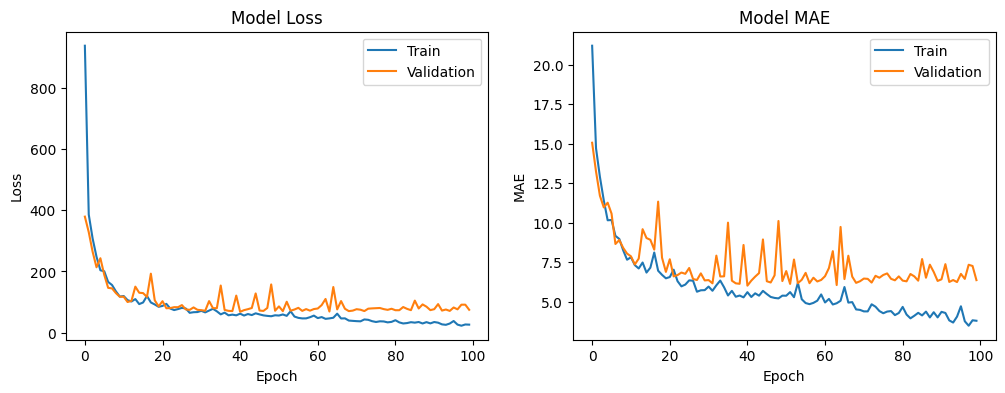

In [ ]:
plot_result(history1)

In [ ]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-100])
    for i in range(num):
        temp = data_pred[-300:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [ ]:
pred1 = make_pred(100, model1)

1/1 [==============================] - 0s 27ms/step


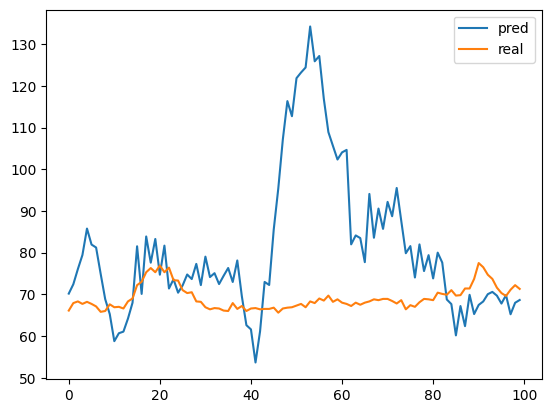

In [ ]:
plt.plot(pred1, label='pred')
plt.plot(y_test, label='real')
plt.legend()

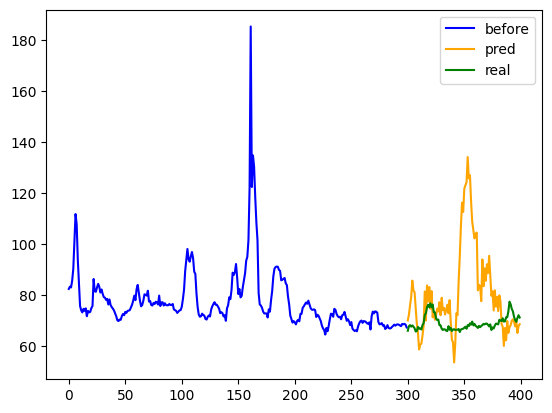

In [ ]:
n = 300
plt.plot(recent['value'].values[-n-100:-100], label='before', color='blue')
plt.plot(range(n, n+100), pred1, label='pred', color='orange')
plt.plot(range(n, n+100), y_test, label='real', color='green')
plt.legend()